In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

Code for generating figures in the paper. The data tables are from `1.precision-at-r-replicates.ipynb`, `3.precision-at-r-dl.ipynb`, `4.precision-at-r-replicates-negcon.ipynb` and `6.precision-at-r-dl-negcon.ipynb`.

In [2]:
cp_df = (
    pd.read_csv('output/cellprofiler_precision_score.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="CellProfiler")
)

dp_df = (
    pd.read_csv('output/deepprofiler_precision_score.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="DeepProfiler")
)

df = pd.concat([cp_df, dp_df], ignore_index=True, join="inner")

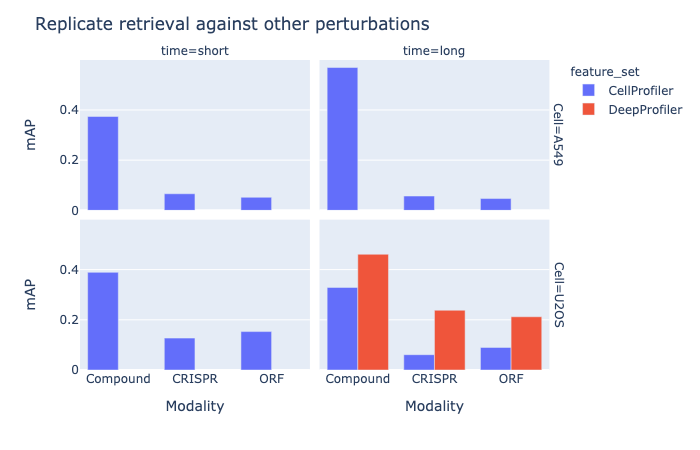

In [3]:
fig = px.bar(data_frame=df,
             x='Modality',
             y='mAP',
             color='feature_set',
             barmode='group',
             facet_row='Cell',
             facet_col='time')
fig.update_layout(title='Replicate retrieval against other perturbations',
                  yaxis=dict(title='mAP'),
                  yaxis3=dict(title='mAP'))
fig.show("png")
fig.write_image(f'figures/7.figure_mAP.png', width=640, height=480, scale=2)

In [4]:
cp_negcon_df = (
    pd.read_csv('output/cellprofiler_precision_score_negcon.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="CellProfiler")
)

dp_negcon_df = (
    pd.read_csv('output/deepprofiler_precision_score_negcon.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="DeepProfiler")
)

negcon_df = pd.concat([cp_negcon_df, dp_negcon_df], ignore_index=True, join="inner")

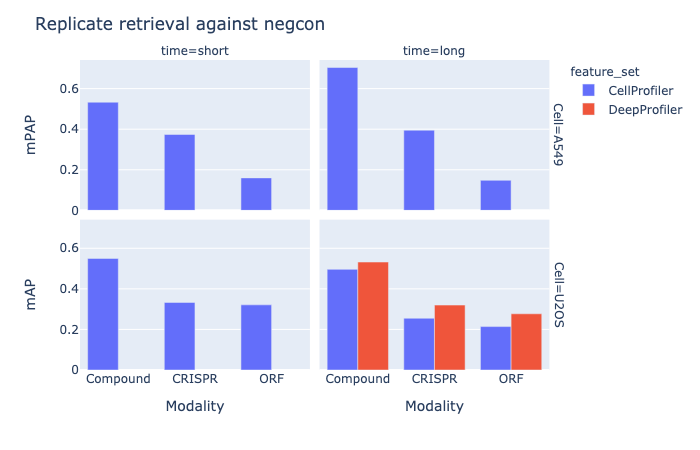

In [5]:
fig = px.bar(data_frame=negcon_df,
             x='Modality',
             y='mAP',
             color='feature_set',
             barmode='group',
             facet_row='Cell',
             facet_col='time')
fig.update_layout(title='Replicate retrieval against negcon',
                  yaxis=dict(title='mAP'),
                  yaxis3=dict(title='mPAP'))
fig.show("png")
fig.write_image(f'figures/7.figure_mAP_negcon.png', width=640, height=480, scale=2)